In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [3]:
super = pd.read_csv(r"C:\Users\Educa informatica\Desktop\CSV, EXCELS, ETC\supermarket_sales - Sheet1.csv")
super.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
super.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
super["Datetime"] = super["Date"] + " " + super["Time"]

In [6]:
super["Datetime"] = pd.to_datetime(super["Datetime"])

In [7]:
super.drop(["Date", "Time"], axis=1, inplace=True)

In [8]:
super.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Datetime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00


In [9]:
super.groupby(["Branch","City"]).size()

Branch  City     
A       Yangon       340
B       Mandalay     332
C       Naypyitaw    328
dtype: int64

In [10]:
super.drop("Branch", axis=1, inplace=True)

In [11]:
gender_buyings = super.groupby(["Gender", "Customer type"])[["Quantity", "Total"]].sum().reset_index()

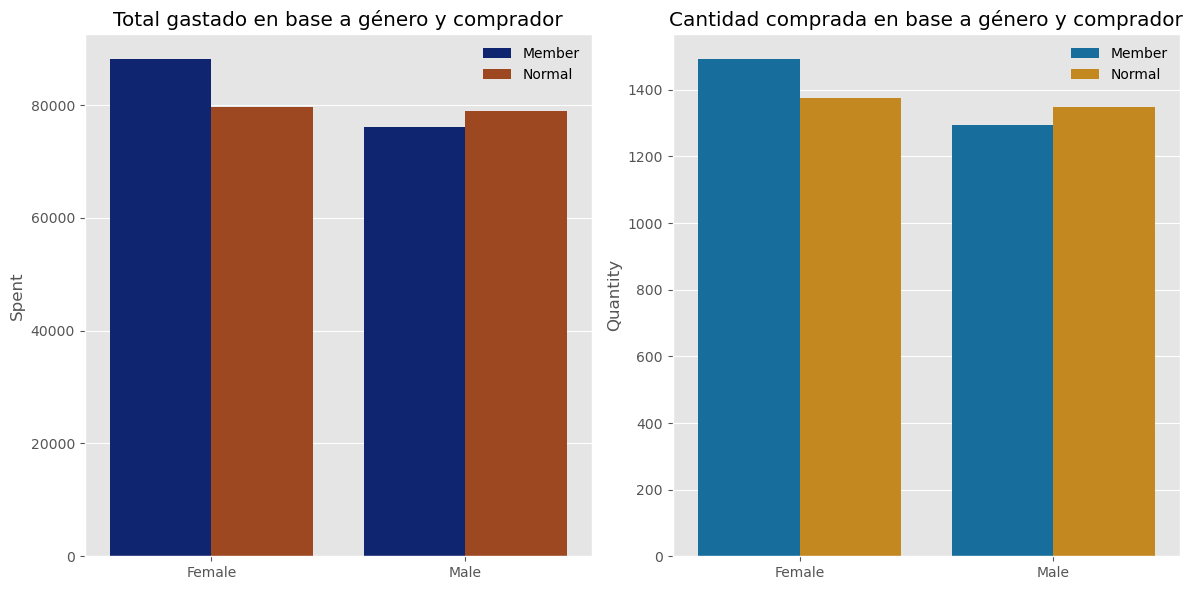

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(data=gender_buyings, x="Gender", y="Total", hue="Customer type", palette="dark", ax=ax[0])
ax[0].set_title("Total gastado en base a género y comprador")
ax[0].set_xlabel(None)
ax[0].set_ylabel("Spent")
ax[0].legend(frameon=False)
sns.barplot(data=gender_buyings, x="Gender", y="Quantity", hue="Customer type", palette="colorblind", ax=ax[1])
ax[1].set_title("Cantidad comprada en base a género y comprador")
ax[1].set_xlabel(None)
ax[1].legend(frameon=False)

plt.tight_layout()

plt.show()

In [13]:
gender_prods = super.groupby("Gender")["Product line"].value_counts().reset_index()
gender_prods 

,Gender,Product line,count
0,Female,Fashion accessories,96
1,Female,Food and beverages,90
2,Female,Sports and travel,88
3,Female,Electronic accessories,84
4,Female,Home and lifestyle,79
5,Female,Health and beauty,64
6,Male,Health and beauty,88
7,Male,Electronic accessories,86
8,Male,Food and beverages,84
9,Male,Fashion accessories,82


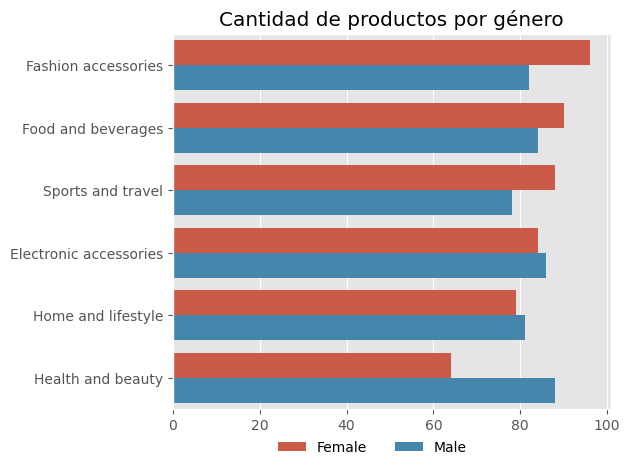

In [14]:
sns.barplot(data=gender_prods, x="count", y="Product line", hue="Gender", orient="h")
plt.title("Cantidad de productos por género")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(frameon=False, bbox_to_anchor=(0.7, -0.05), ncol=2)

plt.tight_layout()

plt.show()

In [15]:
pagos = super.groupby([super["Datetime"].dt.month, "Payment"])["Total"].agg(["count", "sum"]).reset_index()
pagos

,Datetime,Payment,count,sum
0,1,Cash,122,41770.0815
1,1,Credit card,113,38246.5755
2,1,Ewallet,117,36275.2110
3,2,Cash,112,35746.3365
4,2,Credit card,90,31360.0245
5,2,Ewallet,101,30113.0130
6,3,Cash,110,34690.1520
7,3,Credit card,108,31160.4720
8,3,Ewallet,127,43604.8830


C:\Users\Educa informatica\AppData\Local\Temp\ipykernel_12852\3257680066.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(["January", "February", "March"])
C:\Users\Educa informatica\AppData\Local\Temp\ipykernel_12852\3257680066.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["January", "February", "March"])


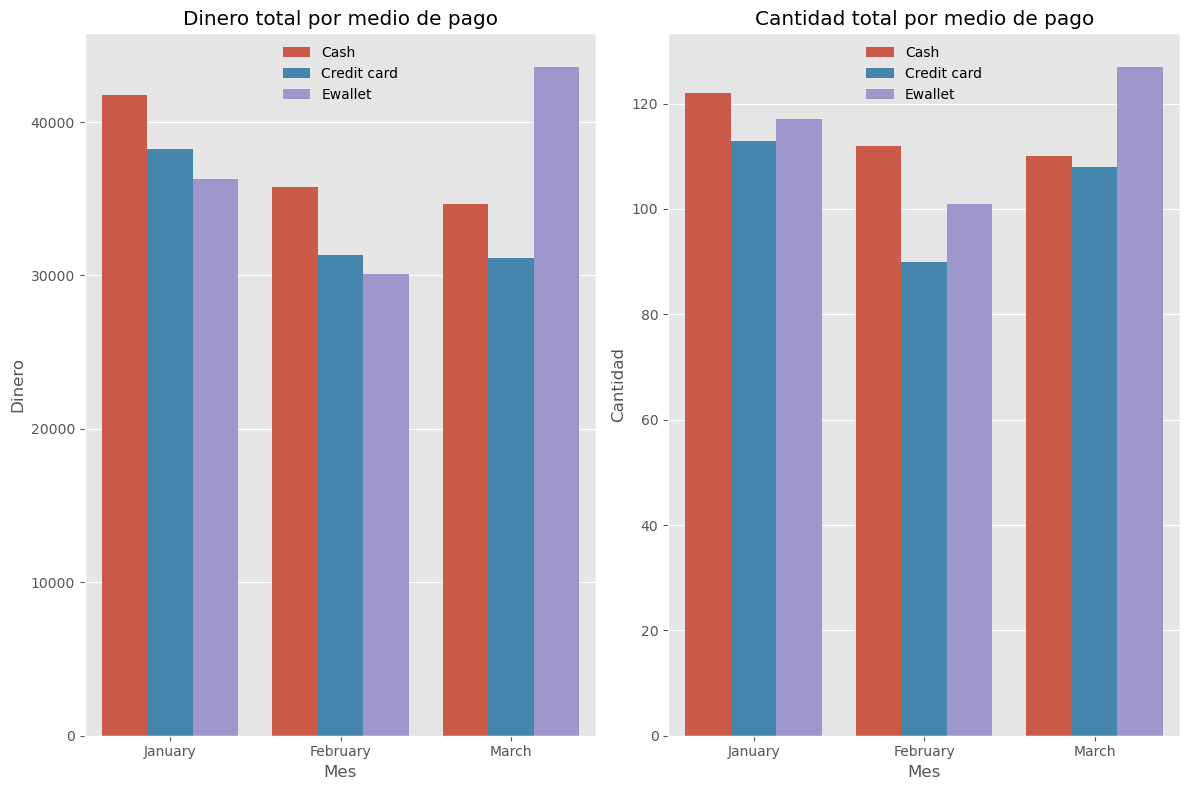

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
sns.barplot(data=pagos, x="Datetime", y="sum", hue="Payment", ax=ax[0])
ax[0].set_title("Dinero total por medio de pago")
ax[0].set_xlabel("Mes")
ax[0].set_ylabel("Dinero")
ax[0].set_xticklabels(["January", "February", "March"])
ax[0].legend(loc="upper center", frameon=False)
sns.barplot(data=pagos, x="Datetime", y="count", hue="Payment", ax=ax[1])
ax[1].set_title("Cantidad total por medio de pago")
ax[1].set_xlabel("Mes")
ax[1].set_ylabel("Cantidad")
ax[1].set_xticklabels(["January", "February", "March"])
ax[1].legend(loc="upper center", frameon=False)

plt.tight_layout()

plt.show()

In [17]:
pago_genero = super.groupby("Gender")["Payment"].value_counts().reset_index()
pago_genero

,Gender,Payment,count
0,Female,Cash,178
1,Female,Credit card,163
2,Female,Ewallet,160
3,Male,Ewallet,185
4,Male,Cash,166
5,Male,Credit card,148


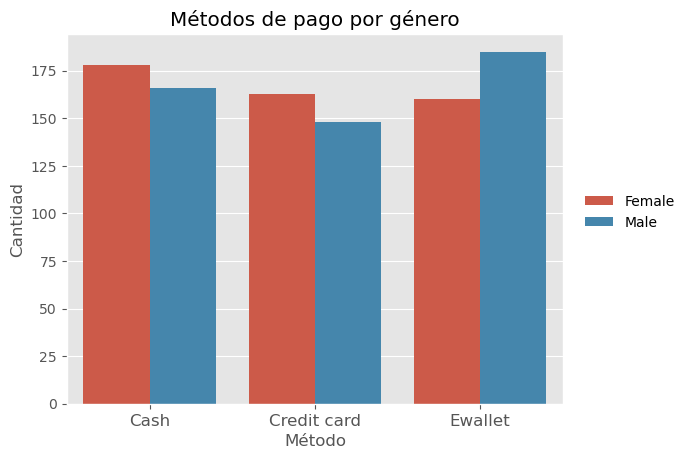

In [18]:
sns.barplot(data=pago_genero, x="Payment", y="count", hue="Gender")
plt.title("Métodos de pago por género")
plt.xlabel("Método")
plt.xticks(fontsize=12)
plt.ylabel("Cantidad")

plt.legend(frameon=False, bbox_to_anchor=(1.25, 0.6))

plt.show()

In [19]:
venta_semanal = super.groupby(pd.Grouper(key="Datetime", freq="W-MON"))["Total"].sum().reset_index()
venta_semanal

,Datetime,Total
0,2019-01-07,20377.6335
1,2019-01-14,25593.5715
2,2019-01-21,27118.8435
3,2019-01-28,31894.4955
4,2019-02-04,25800.2325
5,2019-02-11,29204.4900
6,2019-02-18,22517.4705
7,2019-02-25,20639.8710
8,2019-03-04,28306.9185
9,2019-03-11,27485.6505


C:\Users\Educa informatica\AppData\Local\Temp\ipykernel_12852\2423031778.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=venta_semanal, x="Datetime", y="Total", color="green", marker="o", palette="dark")


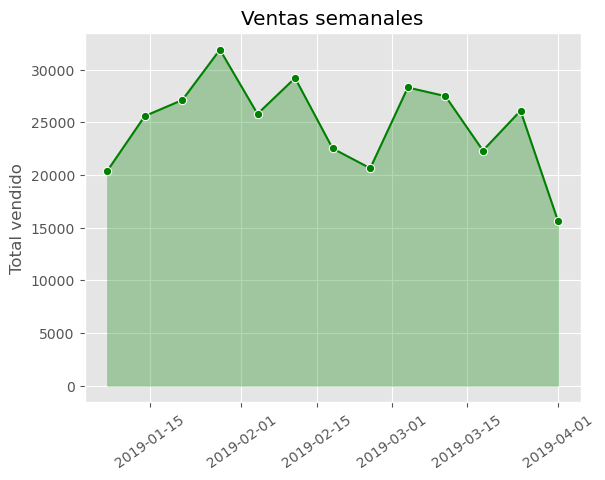

In [42]:
sns.lineplot(data=venta_semanal, x="Datetime", y="Total", color="green", marker="o", palette="dark")
plt.title("Ventas semanales")
plt.xlabel(None)
plt.ylabel("Total vendido")
plt.xticks(rotation=35)

plt.fill_between(venta_semanal["Datetime"], venta_semanal["Total"], color="green", alpha=0.3)

plt.show()

In [21]:
super.groupby(["Gender", "City"])["Rating"].mean()

Gender  City     
Female  Mandalay     6.876543
        Naypyitaw    7.157865
        Yangon       6.839130
Male    Mandalay     6.762353
        Naypyitaw    6.972000
        Yangon       7.196089
Name: Rating, dtype: float64

In [22]:
super.groupby("Product line")["Rating"].mean()

Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64

In [23]:
super.groupby("Customer type")["Rating"].mean()

Customer type
Member    6.940319
Normal    7.005210
Name: Rating, dtype: float64

In [30]:
cities = super.groupby("City")["Total"].sum()
cities

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

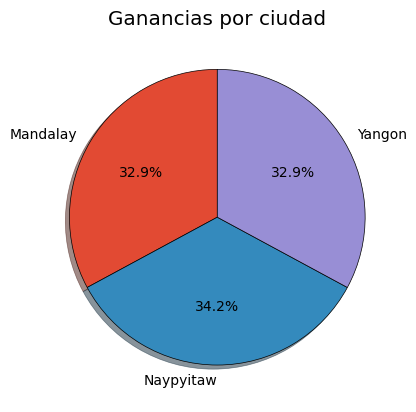

In [33]:
plt.pie(x=cities, labels=cities.index, autopct="%1.1f%%", startangle=90 ,shadow=True, wedgeprops={"edgecolor" : "black"})
plt.title("Ganancias por ciudad")

plt.show()